<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/The%20Market's%20Not%20Normal/Fundamental_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

14:45:21 Starting...
14:45:21 Installing yfinance into Google notebook...
14:45:28 Installing arch into Google notebook...


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


14:45:38 Initialized.


In [2]:
from requests import get
from io import StringIO
ics=pd.read_csv(StringIO("\n".join(get("https://s3.amazonaws.com/public.gillerinvestments.com/ics.csv").text.split("\n")[5:])))\
    .set_index('Ticker').rename(columns={"Sharpe Ratio":("Expected","Sharpe"),"Sharpe Std.Err":("Expected","Std.Err.")})
ics.columns=pd.MultiIndex.from_tuples(map(lambda x:x if isinstance(x,tuple) else (x,""),ics.columns))
ics["Significance"]=ics["Significance"].apply(lambda x:"" if isinstance(x,float) else x)
nprint("Loaded IC data.")
display(ics)

14:45:38 Loaded IC data.


IC Sample Std.Error t Statistic   p Value  Expected            \
                                                            Sharpe  Std.Err.   
Ticker                                                                         
TLT     15.655310    263  6.201737    2.524343  0.005796  2.485203  0.978864   
TBT     14.312030    263  6.201737    2.307745  0.010507  2.271964  0.978864   
TBX     13.722402    200  7.124705    1.926031  0.027050  2.178364  1.122497   
PST     12.183280    200  7.124705    1.710005  0.043632  1.934036  1.122497   
TLH     12.150742    106  9.853293    1.233166  0.108757  1.928870  1.541869   
IEF     11.004294    235  6.565322    1.676124  0.046857  1.746878  1.035539   
BND     10.169429    212  6.917145    1.470177  0.070757  1.614347  1.090266   
IEI      8.468479    235  6.565322    1.289880  0.098546  1.344329  1.035539   
IWM      1.285154    252  6.337243    0.202794  0.419648  0.204012  1.000000   
RWM      0.936303    252  6.337243    0.147746  0.441272  0.148633  1.000000   
GLD      0.518398    251  6.350006    0.081637  0.467468  0.082293  1.001990   
DIA     -0.182462    263  6.201737   -0.029421  0.511736 -0.028965  0.978864   
UUP     -0.260511    245  6.428243   -0.040526  0.516163 -0.041355  1.014185   
UDOW    -1.249974    263  6.201737   -0.201552  0.579867 -0.198427  0.978864   
SPY     -1.928761    263  6.201737   -0.311003  0.622101 -0.306181  0.978864   
TQQQ    -2.104317    263  6.201737   -0.339311  0.632812 -0.334050  0.978864   
QQQ     -2.117569    263  6.201737   -0.341448  0.633617 -0.336154  0.978864   
SH      -2.568577    263  6.201737   -0.414171  0.660625 -0.407749  0.978864   
SPXL    -2.782753    263  6.201737   -0.448705  0.673178 -0.441748  0.978864   
DOG     -3.388992    263  6.201737   -0.546459  0.707625 -0.537986  0.978864   
UDN     -4.827756    241  6.482037   -0.744790  0.771801 -0.766383  1.022567   

             First        Last Significance  
                                             
Ticker                                       
TLT     2023-01-30  2024-02-14           **  
TBT     2023-01-30  2024-02-14            *  
TBX     2023-05-01  2024-02-14            *  
PST     2023-05-01  2024-02-14            *  
TLH     2023-09-14  2024-02-14               
IEF     2023-03-10  2024-02-14            *  
BND     2023-04-13  2024-02-14               
IEI     2023-03-10  2024-02-14               
IWM     2023-02-14  2024-02-14               
RWM     2023-02-14  2024-02-14               
GLD     2023-02-15  2024-02-14               
DIA     2023-01-30  2024-02-14               
UUP     2023-02-24  2024-02-14               
UDOW    2023-01-30  2024-02-14               
SPY     2023-01-30  2024-02-14               
TQQQ    2023-01-30  2024-02-14               
QQQ     2023-01-30  2024-02-14               
SH      2023-01-30  2024-02-14               
SPXL    2023-01-30  2024-02-14               
DOG     2023-01-30  2024-02-14               
UDN     2023-02-24  2024-02-14

In [3]:
srs=pd.read_csv(StringIO("\n".join(get("https://s3.amazonaws.com/public.gillerinvestments.com/sharpes.csv").text.split("\n")[2:])))\
    .rename(columns={"Unnamed: 0":"Ticker","Sharpe":("Actual","Sharpe"),"Std.Err.":("Actual","Std.Err.")}).set_index("Ticker")
srs.columns=pd.MultiIndex.from_tuples(map(lambda x:x if isinstance(x,tuple) else (x,""),srs.columns))
srs["Significance"]=srs["Significance"].apply(lambda x:'' if isinstance(x,float) else x)
nprint("Loaded Sharpe Ratio data.")
display(srs)

14:45:39 Loaded Sharpe Ratio data.


Mean  Std.Dev. Sample    Kurtosis   t Score   p Value  Annualized  \
                                                                                
Ticker                                                                          
QQQ     0.142024  1.078687    265    2.870050  2.143334  0.016500   42.996114   
TBX     0.034700  0.267978    265   10.192314  2.107935  0.017990    9.136537   
TQQQ    0.318694  2.762976    265    3.523910  1.877671  0.030764  122.962041   
Total   0.086313  0.769301    265    4.116632  1.826421  0.034458   24.285840   
TBT     0.115278  1.060003    265   15.923921  1.770370  0.038910   33.687449   
SPY     0.080373  0.763460    265    2.929467  1.713747  0.043875   22.440925   
SPXL    0.179402  2.331182    265    2.776444  1.252779  0.105697   57.096241   
DIA     0.049299  0.671516    265    3.281448  1.195090  0.116562   13.224425   
DOG     0.002225  0.036228    265  268.000000  1.000000  0.159113    0.562386   
PST     0.024998  0.430911    265   15.631375  0.944377  0.172920    6.501386   
TLH     0.023479  0.499332    265    8.676935  0.765428  0.222350    6.094389   
UDOW    0.087483  2.018519    265    3.243935  0.705523  0.240553   24.652486   
UUP     0.011916  0.307584    265    7.424375  0.630638  0.264411    3.048124   
GLD     0.026661  0.751655    265    4.920161  0.577416  0.282075    6.948580   
BND     0.010320  0.335981    265    4.992631  0.500005  0.308744    2.634533   
IEI     0.007760  0.259547    265    5.433210  0.486686  0.313442    1.974597   
TLT     0.026375  0.933911    265    3.879006  0.459737  0.323042    6.871414   
IWM     0.014506  1.099414    265    5.494870  0.214781  0.415052    3.722749   
IEF    -0.004873  0.429817    265    4.410932 -0.184568  0.573145   -1.220571   
RWM    -0.006971  0.354671    265   35.517282 -0.319942  0.625367   -1.741331   
UDN    -0.003120  0.149801    265   10.698507 -0.339021  0.632568   -0.783102   
SH     -0.002741  0.101576    265   97.282316 -0.439215  0.669567   -0.688263   

          Actual           Significance  
          Sharpe  Std.Err.               
Ticker                                   
QQQ     2.090101  1.700909            *  
TBX     2.055580  3.191381            *  
TQQQ    1.831036  1.721232            *  
Total   1.781059  1.816953            *  
TBT     1.726400  3.394916            *  
SPY     1.671183  1.493999            *  
SPXL    1.221664  1.257476               
DIA     1.165408  1.299074               
DOG     0.975163  7.830231               
PST     0.920922  1.975087               
TLH     0.746417  1.402772               
UDOW    0.688000  1.097021               
UUP     0.614975  1.236350               
GLD     0.563075  1.116434               
BND     0.487586  1.084714               
IEI     0.474599  1.090108               
TLT     0.448319  1.043316               
IWM     0.209446  0.998909               
IEF    -0.179984  0.988540               
RWM    -0.311996  1.322772               
UDN    -0.330600  1.096789               
SH     -0.428306  2.269357

In [4]:
from statsmodels.api import add_constant
from statsmodels.regression.linear_model import OLS

ics[list(map(lambda x:("Actual",x),srs["Actual"].columns))]=srs["Actual"]
data=ics.xs("Sharpe",axis=1,level=1)
display(data)
model=OLS(data["Actual"],add_constant(data["Expected"])).fit()
nprint("Naive Regression Analysis\n",model.summary())

,Expected,Actual
Ticker,,
TLT,2.485203,0.448319
TBT,2.271964,1.726400
TBX,2.178364,2.055580
PST,1.934036,0.920922
TLH,1.928870,0.746417
IEF,1.746878,-0.179984
BND,1.614347,0.487586
IEI,1.344329,0.474599
IWM,0.204012,0.209446


14:45:40 Naive Regression Analysis
                             OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.047
Method:                 Least Squares   F-statistic:                    0.1056
Date:                Thu, 15 Feb 2024   Prob (F-statistic):              0.749
Time:                        14:45:40   Log-Likelihood:                -23.900
No. Observations:                  21   AIC:                             51.80
Df Residuals:                      19   BIC:                             53.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0

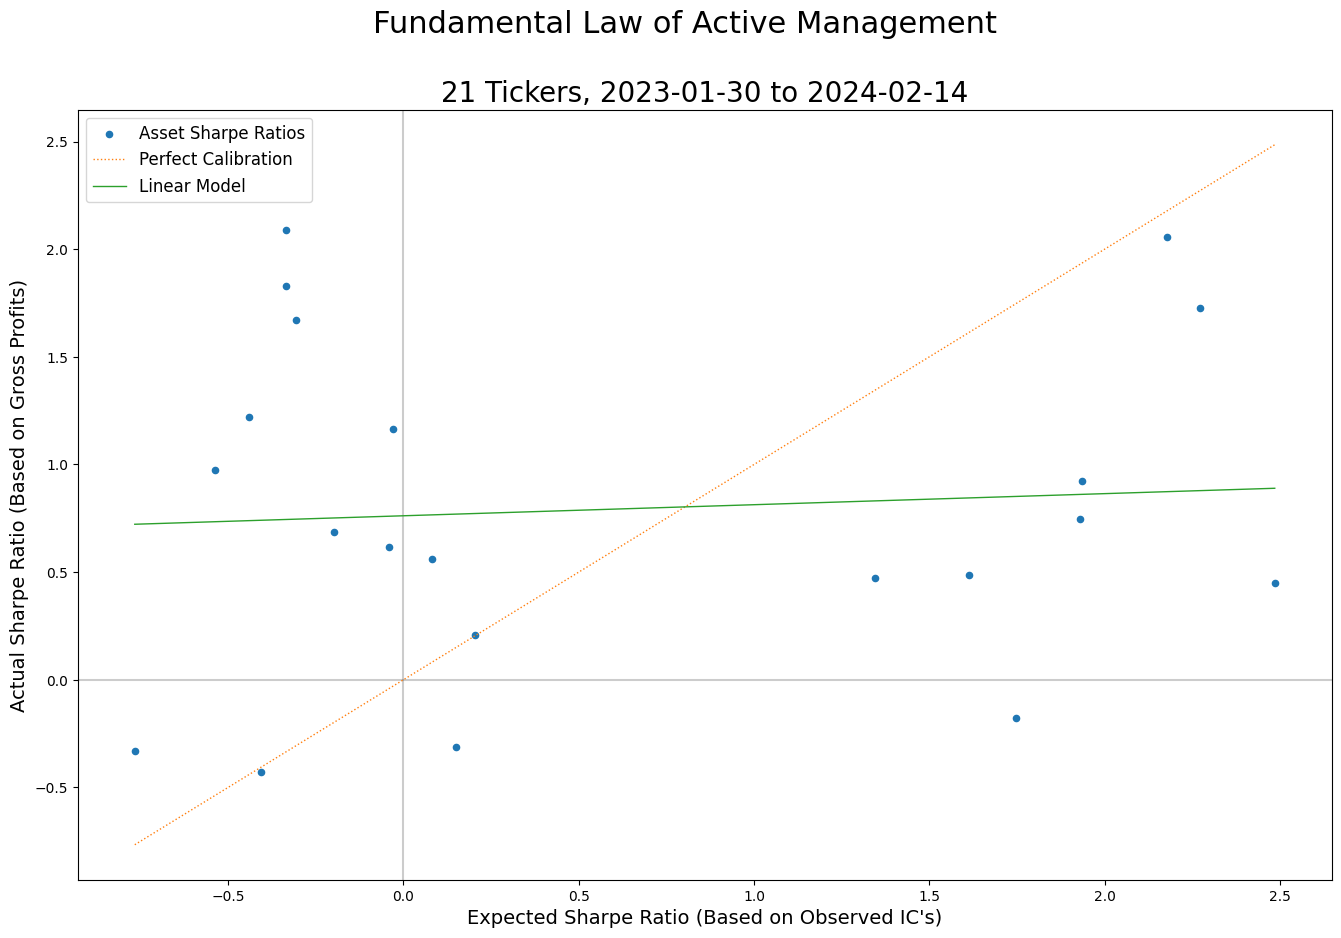

In [45]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
data.plot.scatter("Expected","Actual",ax=plot,label="Asset Sharpe Ratios",color='C0')
plot.axhline(color='black',alpha=0.2)
plot.axvline(color='black',alpha=0.2)
x=[data["Expected"].min(),data["Expected"].max()]
y=list(map(lambda x:model.params[0]+model.params[1]*x,x))
plot.plot(x,x,':',label="Perfect Calibration",color='C1',linewidth=1)
plot.plot(x,y,'-',label="Linear Model",color='C2',linewidth=1)
plot.legend(fontsize=12)
plot.set_xlabel(plot.get_xlabel()+" Sharpe Ratio (Based on Observed IC's)",fontsize=14)
plot.set_ylabel(plot.get_ylabel()+" Sharpe Ratio (Based on Gross Profits)",fontsize=14)
title="Fundamental Law of Active Management"
figure.suptitle(title,fontsize=22)
subtitle="%d Tickers, %s to %s" % (data.shape[0],ics["First"].min(),ics["Last"].max())
plot.set_title(subtitle,fontsize=20)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

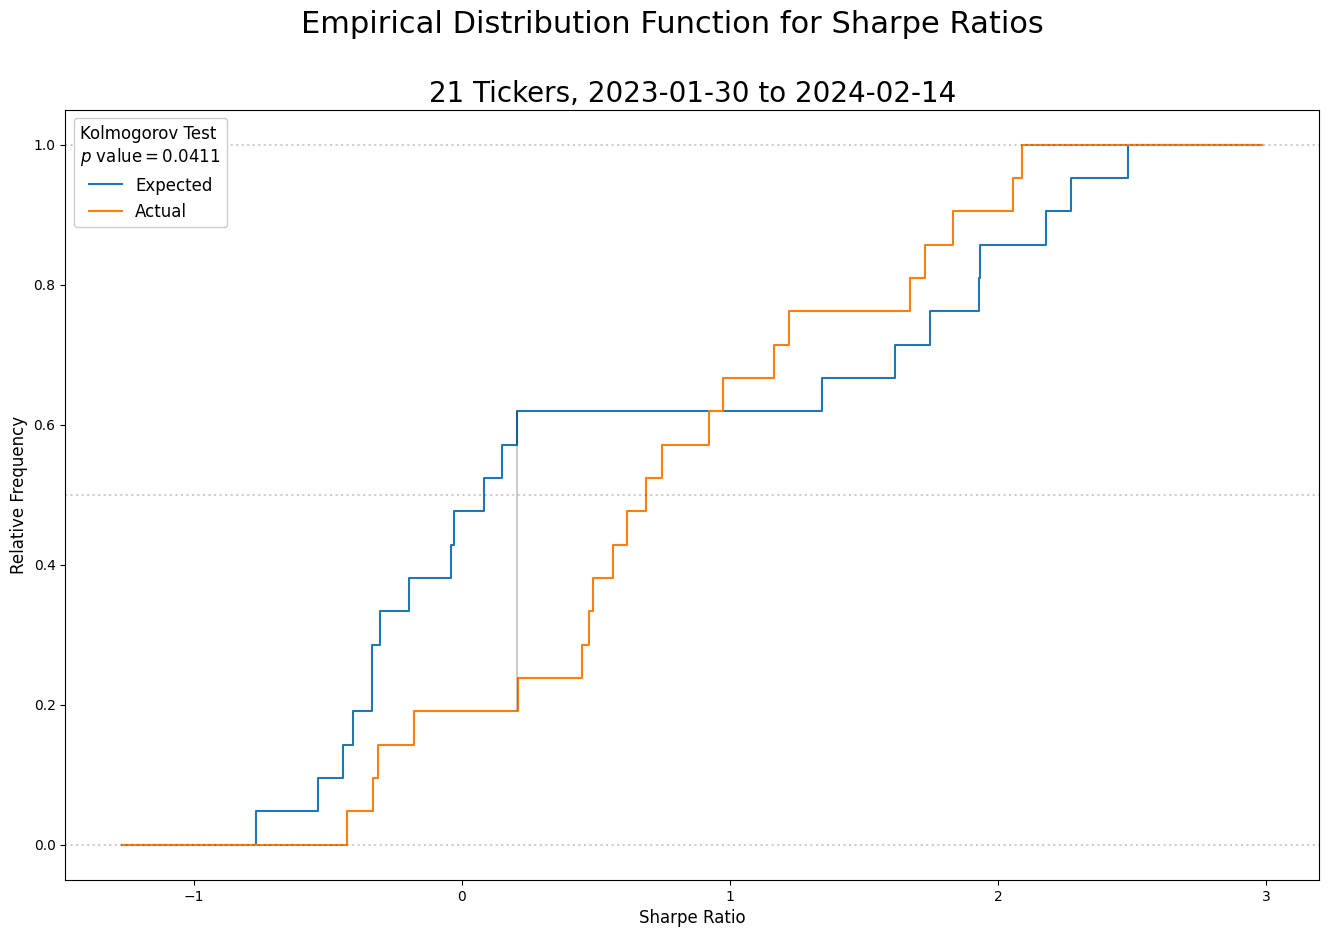

In [103]:
from scipy.stats import ecdf,ks_2samp
ks=ks_2samp(data['Expected'],data['Actual'])
df=pd.DataFrame()
mn,mx=data.min().min()-half,data.max().max()+half

for variable in data:
    e=ecdf(data[variable]).cdf
    df[(variable,'x')]=[mn]+list(e.quantiles)+[mx]
    df[(variable,'F')]=[zero]+list(e.probabilities)+[one]

df.columns=pd.MultiIndex.from_tuples(tuple(df.columns))
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))

for variable in data:
    plot.step(df[(variable,'x')],df[(variable,'F')],label=variable,where='post')

plot.legend(fontsize=12)

for y in zero,half,one:
    plot.axhline(y,color='black',alpha=0.2,ls=':')

i=df[df[('Expected','x')]==ks.statistic_location].index
x,yx=df.loc[df.index[i],('Expected','x')],df.loc[df.index[i],('Expected','F')]
yn=yx-ks.statistic
plot.vlines(x,yn,yx,color='black',alpha=0.2)
plot.set_xlabel('Sharpe Ratio',fontsize=12)
plot.set_ylabel('Relative Frequency',fontsize=12)
title="Empirical Distribution Function for Sharpe Ratios"
figure.suptitle(title,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.legend(title="Kolmogorov Test\n$p~\\mathrm{value} = %12.4f$" % ks.pvalue,fontsize=12,framealpha=1,title_fontsize=12)
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

In [78]:
df[df[('Actual')]]

KstestResult(statistic=0.42857142857142855, pvalue=0.041088503979639056, statistic_location=0.2040118262785973, statistic_sign=1)

In [84]:
[df.loc[df.index[i],('Expected','F')].values[0],df.loc[df.index[i],('Actual','F')].values[0]]

[0.6190476190476191, 0.6190476190476191]